In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

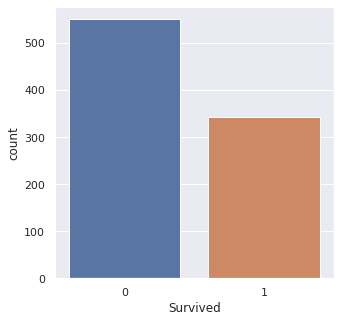

In [4]:
plt.figure(figsize = (5, 5))

sns.countplot('Survived', data = train)
plt.show()

In [5]:
value = train.Survived.value_counts() #count of people survived
labels = ['Not Survived','Survived']
value

0    549
1    342
Name: Survived, dtype: int64

**Passenger Ticket Class**

In [6]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

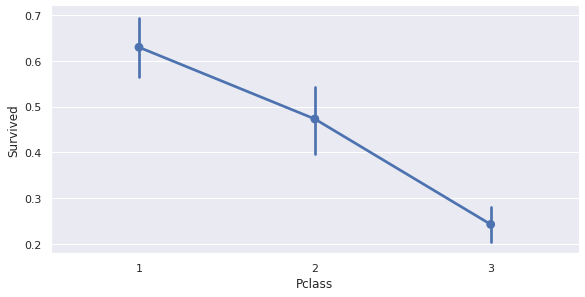

In [8]:
sns.catplot('Pclass', 'Survived', kind = 'point', data = train, height = 4, aspect = 2)
plt.show()

**Name**

In [9]:
train.Name.value_counts()

Odahl, Mr. Nils Martin                                     1
Skoog, Master. Harald                                      1
Salkjelsvik, Miss. Anna Kristine                           1
Carter, Mrs. Ernest Courtenay (Lilian Hughes)              1
Klasen, Mr. Klas Albin                                     1
                                                          ..
Dorking, Mr. Edward Arthur                                 1
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)    1
Molson, Mr. Harry Markland                                 1
Jensen, Mr. Niels Peder                                    1
Karun, Miss. Manca                                         1
Name: Name, Length: 891, dtype: int64

In [10]:
train.shape

(891, 12)

In [11]:
len(train.Name.unique())

891

**Sex**

In [12]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

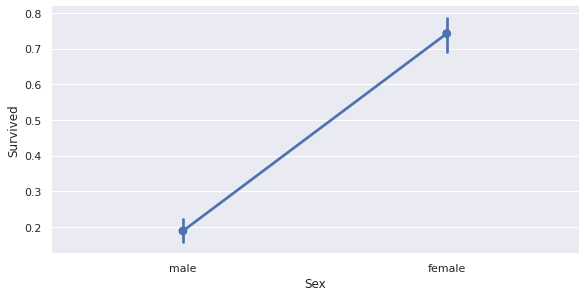

In [14]:
sns.catplot(x = 'Sex', y = 'Survived', data = train, kind = 'point', height = 4, aspect =2)
plt.show()

Sex with Pclass

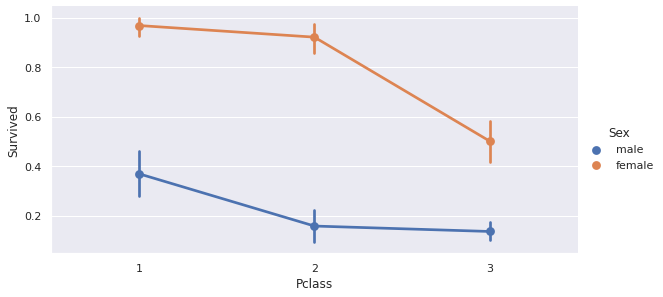

In [15]:
sns.catplot(x = 'Pclass', y = 'Survived', kind = 'point', data = train, hue = 'Sex', height = 4, aspect = 2)
plt.show()

**Age**

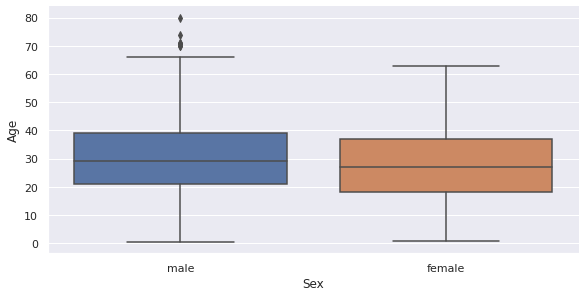

In [16]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train, height = 4, aspect = 2)
plt.show()

Age with Pclass

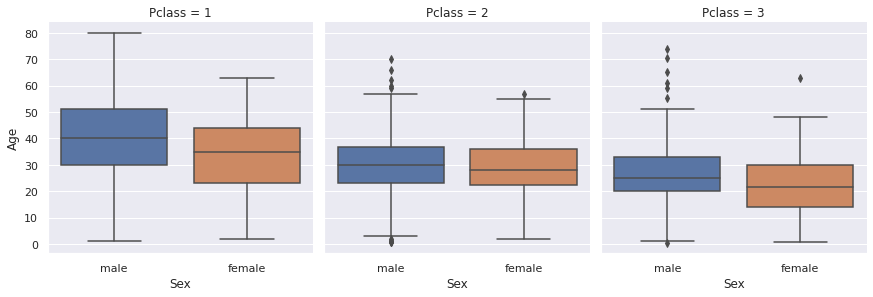

In [17]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train, col = 'Pclass', height = 4)
plt.show()

**Fare**

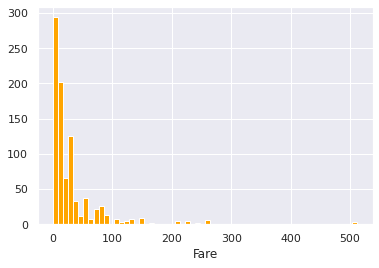

In [18]:
plt.figure(figsize = (6, 4))

plt.hist(train.Fare, bins = 60, color = 'orange')
plt.xlabel('Fare')
plt.show()

A lot of zero values here, so we will replace zero values with mean

**Sibling Spouse**

In [19]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

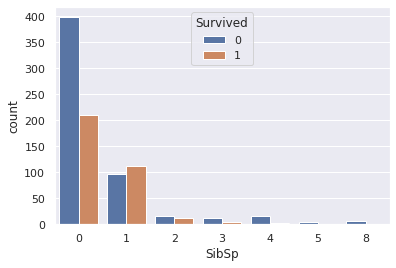

In [20]:
plt.figure(figsize = (6, 4))

sns.countplot(x = 'SibSp', data = train, hue = 'Survived')
plt.show()

SibSp survival by Sex

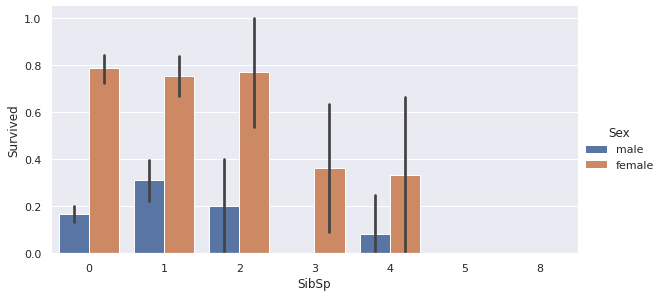

In [21]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = train, height = 4, aspect = 2)
plt.show()

Passenger survival by SibSp and Pclass

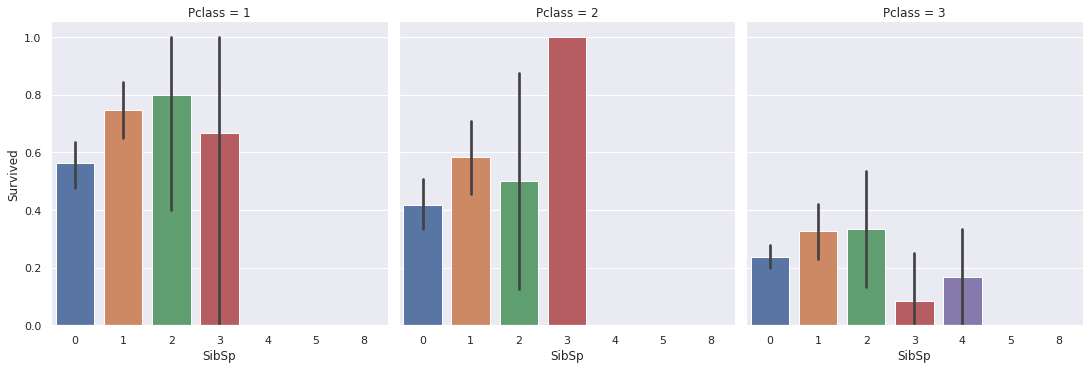

In [22]:
sns.catplot(x = 'SibSp', y = 'Survived', col = 'Pclass', kind = 'bar', data = train)
plt.show()

Passenger Survival by SibSp and Sex

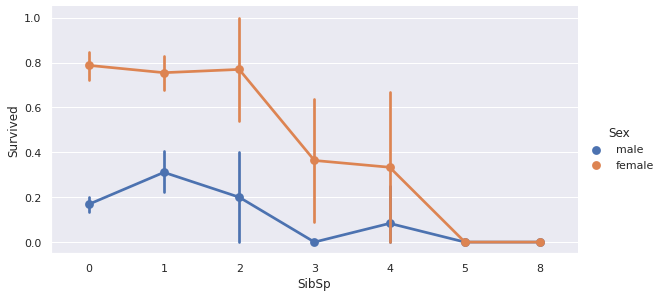

In [23]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'point', hue = 'Sex', data = train, height = 4, aspect = 2)
plt.show()

**Parch**

In [24]:
train.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

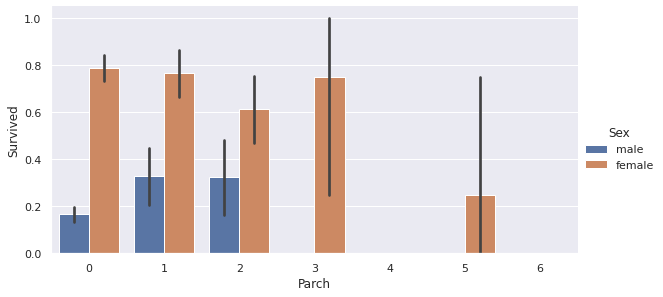

In [25]:
sns.catplot(x = 'Parch', y = 'Survived', data = train, hue = 'Sex', kind = 'bar', height = 4, aspect = 2)
plt.show()

**Ticket**

In [26]:
train.Ticket.value_counts()

CA. 2343            7
347082              7
1601                7
3101295             6
CA 2144             6
                   ..
312993              1
349910              1
STON/O2. 3101282    1
7540                1
237565              1
Name: Ticket, Length: 681, dtype: int64

In [27]:
len(train.Ticket.unique())

681

**Embarked**

In [28]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

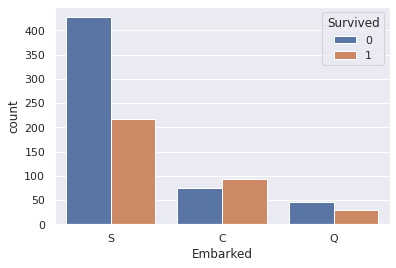

In [29]:
plt.figure(figsize = (6, 4))

sns.countplot('Embarked', hue = 'Survived', data = train)
plt.show()

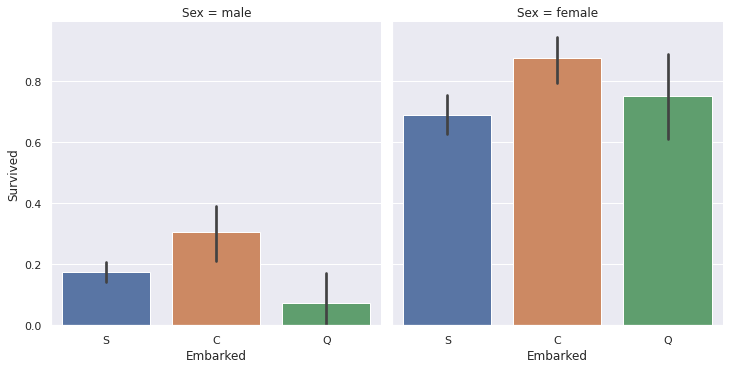

In [30]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = train, col = 'Sex')
plt.show()

After Analysis:
* Females survived more than males.
* Higher class passengers survived more
* Name has unique values so not suitable
* Survival Rate is higher for those who were travelling with siblings or spouses
* Survival Rate is higher for those who were travelling with Parents or Children
* Ticket does not impact survival
* Cabin is not useful as it has a lot of null values
* Passengers from Cherbourg port survived more than the other two ports


Training Data Preprocessing

In [31]:
train.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True )

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [33]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [34]:
train['Fare'] = train['Fare'].replace(0, train['Fare'].mean())

In [35]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [36]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [37]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [39]:
train['Embarked'] = train['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [40]:
train['Sex'] = train['Sex'].map({'male' : 1, 'female': 0})

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [42]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.746366,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.514272,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,4.012500,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,15.100000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,32.204208,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [43]:
train.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Sex                0.228475
Age              169.052400
SibSp              1.216043
Parch              0.649728
Fare            2451.663181
Embarked           0.404081
dtype: float64

High variance in fare, age so normalize

In [44]:
train['Age'] = np.log(train['Age'])
train['Fare'] = np.log(train['Fare'])

In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,3.091042,1,0,1.981001,0
1,2,1,1,0,3.637586,1,0,4.266662,1
2,3,1,3,0,3.258097,0,0,2.070022,0
3,4,1,1,0,3.555348,1,0,3.972177,0
4,5,0,3,1,3.555348,0,0,2.085672,0


Test Data

In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
test.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [49]:
test['Fare'] = test['Fare'].replace(0, test['Fare'].mean())

In [50]:
test['Age'].fillna(test['Age'].mean(), inplace = True)

In [51]:
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace = True)

In [52]:
test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [53]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [54]:
test['Embarked'] = test['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})

In [55]:
test['Sex'] = test['Sex'].map({'male' : 1, 'female': 0})

In [56]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0


In [57]:
test['Age'] = np.log(test['Age'])
test['Fare'] = np.log(test['Fare'])

In [58]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,3.091042,1,0,1.981001,0
1,2,1,1,0,3.637586,1,0,4.266662,1
2,3,1,3,0,3.258097,0,0,2.070022,0
3,4,1,1,0,3.555348,1,0,3.972177,0
4,5,0,3,1,3.555348,0,0,2.085672,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,3.295837,0,0,2.564949,0
887,888,1,1,0,2.944439,0,0,3.401197,0
888,889,0,3,0,3.391117,1,2,3.154870,0
889,890,1,1,1,3.258097,0,0,3.401197,1


**Model Building**

In [59]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)

**Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [62]:
# accuracy score, confusion matrix and classification report of logistic regression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_acc = accuracy_score(y_test, lr.predict(X_test))

print(f"Training Accuracy is {accuracy_score(y_train, lr.predict(X_train))}\n")
print(f"Test Accuracy is {lr_acc}")

print(f"\n Confusion Matrix \n {confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f" Classification Report \n {classification_report(y_test, lr.predict(X_test))}")

Training Accuracy is 0.7945425361155698

Test Accuracy is 0.8059701492537313

 Confusion Matrix 
 [[146  22]
 [ 30  70]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       168
           1       0.76      0.70      0.73       100

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



**KNN**

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}\n")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.7287319422150883

Test Accuracy of KNN is 0.5410447761194029 

Confusion Matrix :- 
[[117  51]
 [ 72  28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.62      0.70      0.66       168
           1       0.35      0.28      0.31       100

    accuracy                           0.54       268
   macro avg       0.49      0.49      0.48       268
weighted avg       0.52      0.54      0.53       268



**Decison Tree Classifier**

In [64]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.746268656716418 

Confusion Matrix :- 
[[131  37]
 [ 31  69]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       168
           1       0.65      0.69      0.67       100

    accuracy                           0.75       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.75      0.75      0.75       268



**Random Forest Classifier**

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rf_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.8208955223880597 

Confusion Matrix :- 
[[146  22]
 [ 26  74]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       168
           1       0.77      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [66]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [lr_acc, knn_acc, dtc_acc, rf_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest Classifier,0.820896
0,Logistic Regression,0.805970
2,Decision Tree Classifier,0.746269
1,KNN,0.541045


In [67]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,3.540959,0,0,2.057860,2
1,893,3,0,3.850148,1,0,1.945910,0
2,894,2,1,4.127134,0,0,2.270836,2
3,895,3,1,3.295837,0,0,2.159003,0
4,896,3,0,3.091042,1,1,2.508582,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,3.410243,0,0,2.085672,0
414,1306,1,0,3.663562,0,0,4.690430,1
415,1307,3,1,3.650658,0,0,1.981001,0
416,1308,3,1,3.410243,0,0,2.085672,0


**Since Random Forest gives the best accuracy we will choose Random Forest**

In [68]:
predict1 = rf.predict(test)
print(predict1)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 1 0 1 0 1 0 0 1 0 0 0]


In [69]:
list1 = np.array(predict1).tolist()
len(list1)

418

In [70]:
test.insert(7,column="Survived",value=list1)

In [71]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,Embarked
0,892,3,1,3.540959,0,0,2.057860,0,2
1,893,3,0,3.850148,1,0,1.945910,0,0
2,894,2,1,4.127134,0,0,2.270836,0,2
3,895,3,1,3.295837,0,0,2.159003,0,0
4,896,3,0,3.091042,1,1,2.508582,0,0


Making the submission csv

In [72]:
Submission = test.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'],axis=1)
Submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [73]:
Submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
Submission.to_csv('Submission.csv',index=False)